In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
data= keras.datasets.mnist

In [9]:
(X_train_full, y_train_full), (X_test, y_test)= data.load_data()

In [11]:
X_train_full.shape

(60000, 28, 28)

In [12]:
y_train_full.shape

(60000,)

In [13]:
X_test.shape

(10000, 28, 28)

In [14]:
y_test.shape

(10000,)

In [23]:
#Reshape

In [20]:
X_train=X_train_full.reshape((60000,28,28,1))

In [21]:
X_test=X_test.reshape((10000,28,28,1))

In [22]:
#Normalize
x_train=keras.utils.normalize(X_train, axis=1)
x_test=keras.utils.normalize(X_test, axis=1)

In [24]:
#Create Validation sets
x_valid, x_train= x_train[:6000], x_train[6000:]
y_valid, y_train= y_train_full[:6000], y_train_full[6000:]

In [25]:
np.random.seed(42)
tf.random.set_seed(42)

In [26]:
#Architecture
model_A=keras.models.Sequential()
model_A.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28,28,1)))
model_A.add(keras.layers.MaxPooling2D(2,2))
model_A.add(keras.layers.Flatten())
model_A.add(keras.layers.Dense(200, activation='relu'))
model_A.add(keras.layers.Dense(100, activation='relu'))             
model_A.add(keras.layers.Dense(10, activation= 'softmax'))

In [27]:
model_A.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 200)               1081800   
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [29]:
#Compiling
model_A.compile(optimizer='sgd',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [31]:
#Training
model_A_history=model_A.fit(x_train, y_train, epochs=60, validation_data=(x_valid, y_valid))

Epoch 1/60
1688/1688 [==============================] - 42s 24ms/step - loss: 0.8169 - accuracy: 0.7916 - val_loss: 0.3140 - val_accuracy: 0.9053
Epoch 2/60
1688/1688 [==============================] - 42s 25ms/step - loss: 0.2877 - accuracy: 0.9146 - val_loss: 0.2350 - val_accuracy: 0.9328
Epoch 3/60
1688/1688 [==============================] - 40s 24ms/step - loss: 0.2210 - accuracy: 0.9338 - val_loss: 0.1812 - val_accuracy: 0.9498
Epoch 4/60
1688/1688 [==============================] - 40s 24ms/step - loss: 0.1804 - accuracy: 0.9450 - val_loss: 0.1610 - val_accuracy: 0.9525
Epoch 5/60
1688/1688 [==============================] - 40s 24ms/step - loss: 0.1537 - accuracy: 0.9530 - val_loss: 0.1385 - val_accuracy: 0.9620
Epoch 6/60
1688/1688 [==============================] - 39s 23ms/step - loss: 0.1345 - accuracy: 0.9591 - val_loss: 0.1270 - val_accuracy: 0.9652
Epoch 7/60
1688/1688 [==============================] - 40s 24ms/step - loss: 0.1196 - accuracy: 0.9640 - val_loss: 0.1145 -

Epoch 57/60
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0037 - accuracy: 0.9996 - val_loss: 0.0805 - val_accuracy: 0.9808
Epoch 58/60
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0035 - accuracy: 0.9997 - val_loss: 0.0820 - val_accuracy: 0.9787
Epoch 59/60
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0032 - accuracy: 0.9997 - val_loss: 0.0820 - val_accuracy: 0.9797
Epoch 60/60
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0032 - accuracy: 0.9996 - val_loss: 0.0811 - val_accuracy: 0.9795


In [32]:
model_A_history.params

{'verbose': 1, 'epochs': 60, 'steps': 1688}

In [33]:
model_A_history.history

{'loss': [0.8168704509735107,
  0.2876855731010437,
  0.22099898755550385,
  0.18036018311977386,
  0.15365099906921387,
  0.13451191782951355,
  0.1196228489279747,
  0.10797326266765594,
  0.0986638069152832,
  0.09055918455123901,
  0.08302881568670273,
  0.07712908834218979,
  0.07083230465650558,
  0.06659451127052307,
  0.062386974692344666,
  0.05838226526975632,
  0.05447116494178772,
  0.050686631351709366,
  0.04755057021975517,
  0.044412728399038315,
  0.042267922312021255,
  0.03931136056780815,
  0.037078917026519775,
  0.03476783633232117,
  0.03246205300092697,
  0.03062358871102333,
  0.028689827769994736,
  0.027665918692946434,
  0.02536461316049099,
  0.024202534928917885,
  0.022316383197903633,
  0.021395478397607803,
  0.019801655784249306,
  0.018675101920962334,
  0.01725688949227333,
  0.01617700234055519,
  0.015527129173278809,
  0.014157960191369057,
  0.013286176137626171,
  0.012356110848486423,
  0.011755252256989479,
  0.010913953185081482,
  0.01020615

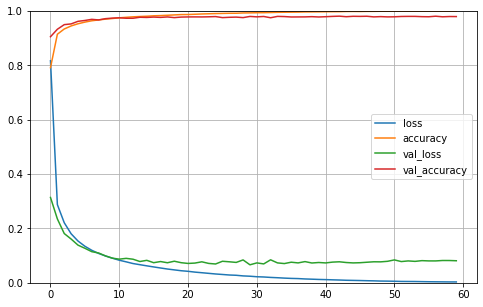

In [34]:
import pandas as pd
pd.DataFrame(model_A_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [36]:
test_loss, test_acc= model_A.evaluate(x_test,y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.0741 - accuracy: 0.9824


In [37]:
print("Tested Accuracy A:",test_acc)

Tested Accuracy A: 0.9824000000953674


Model B

In [38]:
model_B=keras.models.Sequential()
model_B.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28,28,1)))
model_B.add(keras.layers.MaxPooling2D(2,2))
model_B.add(keras.layers.Flatten())
model_B.add(keras.layers.Dense(200, activation='relu'))
model_B.add(keras.layers.Dense(100, activation='relu'))             
model_B.add(keras.layers.Dense(10, activation= 'softmax'))

In [39]:
model_B.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_3 (Dense)             (None, 200)               2163400   
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                      

In [40]:
#Compiling
model_B.compile(optimizer='sgd',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [41]:
model_B_history=model_B.fit(x_train, y_train, epochs=60, validation_data=(x_valid, y_valid))

Epoch 1/60
1688/1688 [==============================] - 65s 38ms/step - loss: 0.7609 - accuracy: 0.8132 - val_loss: 0.3047 - val_accuracy: 0.9067
Epoch 2/60
1688/1688 [==============================] - 63s 38ms/step - loss: 0.2843 - accuracy: 0.9160 - val_loss: 0.2333 - val_accuracy: 0.9347
Epoch 3/60
1688/1688 [==============================] - 63s 37ms/step - loss: 0.2209 - accuracy: 0.9333 - val_loss: 0.1815 - val_accuracy: 0.9487
Epoch 4/60
1688/1688 [==============================] - 64s 38ms/step - loss: 0.1806 - accuracy: 0.9455 - val_loss: 0.1605 - val_accuracy: 0.9555
Epoch 5/60
1688/1688 [==============================] - 63s 37ms/step - loss: 0.1527 - accuracy: 0.9538 - val_loss: 0.1437 - val_accuracy: 0.9618
Epoch 6/60
1688/1688 [==============================] - 80s 47ms/step - loss: 0.1325 - accuracy: 0.9594 - val_loss: 0.1275 - val_accuracy: 0.9653
Epoch 7/60
1688/1688 [==============================] - 73s 43ms/step - loss: 0.1171 - accuracy: 0.9653 - val_loss: 0.1150 -

Epoch 57/60
1688/1688 [==============================] - 69s 41ms/step - loss: 0.0033 - accuracy: 0.9997 - val_loss: 0.0739 - val_accuracy: 0.9807
Epoch 58/60
1688/1688 [==============================] - 71s 42ms/step - loss: 0.0033 - accuracy: 0.9998 - val_loss: 0.0745 - val_accuracy: 0.9818
Epoch 59/60
1688/1688 [==============================] - 69s 41ms/step - loss: 0.0031 - accuracy: 0.9999 - val_loss: 0.0756 - val_accuracy: 0.9813
Epoch 60/60
1688/1688 [==============================] - 64s 38ms/step - loss: 0.0031 - accuracy: 0.9996 - val_loss: 0.0760 - val_accuracy: 0.9812


In [42]:
model_B_history.params

{'verbose': 1, 'epochs': 60, 'steps': 1688}

In [43]:
model_B_history.history

{'loss': [0.7609202861785889,
  0.2842690348625183,
  0.22087378799915314,
  0.18062986433506012,
  0.15270750224590302,
  0.13254038989543915,
  0.11709827929735184,
  0.10463756322860718,
  0.09533863514661789,
  0.0868324488401413,
  0.07981333136558533,
  0.07394780963659286,
  0.06771537661552429,
  0.06334304809570312,
  0.059235986322164536,
  0.05566732957959175,
  0.05193120986223221,
  0.048461850732564926,
  0.04546704888343811,
  0.042421530932188034,
  0.04008054733276367,
  0.03695937991142273,
  0.035647254437208176,
  0.033425744622945786,
  0.030909350141882896,
  0.029000576585531235,
  0.02699584886431694,
  0.025618990883231163,
  0.02430056594312191,
  0.022474829107522964,
  0.02067428082227707,
  0.019533438608050346,
  0.018230341374874115,
  0.017183100804686546,
  0.015546515583992004,
  0.015107622370123863,
  0.013957113027572632,
  0.012783152982592583,
  0.012140301987528801,
  0.011132740415632725,
  0.01013532280921936,
  0.009456497617065907,
  0.009239

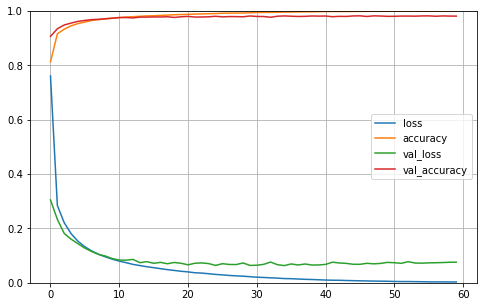

In [44]:
import pandas as pd
pd.DataFrame(model_B_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [46]:
test_loss, test_acc= model_B.evaluate(x_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.0603 - accuracy: 0.9833


In [47]:
print("Tested Accuracy B:",test_acc)

Tested Accuracy B: 0.983299970626831


In [48]:
class_names=["0","1","2","3","4","5","6","7","8","9"]

In [49]:
prediction=model_A.predict(X_test)
print(class_names[np.argmax(prediction[78])])

313/313 [==============================] - 3s 8ms/step
9


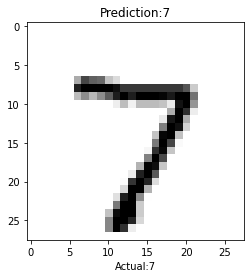

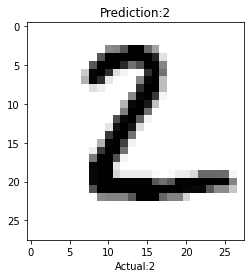

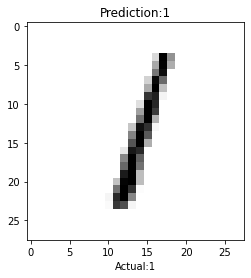

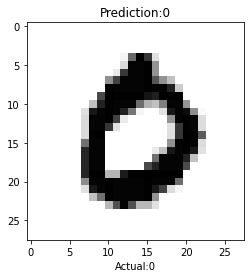

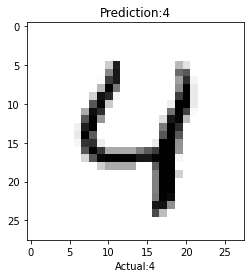

In [50]:
for i in range(5):
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel("Actual:"+class_names[y_test[i]])
    plt.title("Prediction:"+class_names[np.argmax(prediction[i])])
    plt.show()